In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#!pip install finance-byu
#import finance_byu as fin

In [4]:
data = pd.read_feather('crsp_daily.ftr')

In [5]:
mkt = pd.read_csv('dsi.csv',parse_dates = ['caldt'])

In [6]:
mkt.head()

,caldt,mkt,ewmkt
0,1925-12-31,NaN,NaN
1,1926-01-02,0.005689,0.009516
2,1926-01-04,0.000706,0.005780
3,1926-01-05,-0.004821,-0.001927
4,1926-01-06,-0.000423,0.001182


In [7]:
data = data.merge(mkt, on = 'caldt')

In [8]:
data.head()
data['month-year'] = data['caldt'].dt.month.astype(str) + data['caldt'].dt.year.astype(str)

In [131]:
data = data.query('5 <= prc <= 1000')

In [10]:
data['ex_ret'] = data['ret'] - data['mkt']

In [11]:
data['ret_lag'] = data.groupby(['permno'])['ret'].shift(1)
data['ex_ret_lag'] = data.groupby(['permno'])['ex_ret'].shift(1)

In [12]:
data['sign_ex_ret_lag'] = data['ex_ret_lag'].transform(lambda x: np.sign(x))

In [44]:
ken_french = pd.read_csv('F-F_Research_Data_Factors_weekly.csv')

In [49]:
ken_french['month_year'] = pd.to_datetime(ken_french.iloc[:,0].astype(str).str[:4] + '-' + ken_french.iloc[:,0].astype(str).str[4:6] + '-' + ken_french.iloc[:,0].astype(str).str[6:])


In [55]:
data['month_year_permno'] = data['permno'].astype(str) + data['month-year'].astype(str)

In [76]:
data['caldt']

1           1986-01-07
3           1986-01-07
4           1986-01-07
9           1986-01-07
10          1986-01-07
               ...    
102297583   2022-09-30
102297584   2022-09-30
102297585   2022-09-30
102297586   2022-09-30
102297588   2022-09-30
Name: caldt, Length: 69010266, dtype: datetime64[ns]

In [70]:
monthly_prc_vars = data.groupby(['month_year_permno']).last()

In [58]:
monthly_prc_vars = monthly_prc_vars.sort_values(['permno','caldt']).reset_index(drop=True)

In [72]:
monthly_prc_vars['stock_val']=monthly_prc_vars['prc']*monthly_prc_vars['shr']

In [74]:
monthly_prc_vars

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,mkt,ewmkt,month-year,ex_ret,ret_lag,ex_ret_lag,sign_ex_ret_lag,dol_volume_lag,prod_dvl_ser,month_year_perm,stock_val
month_year_permno,,,,,,,,,,,,,,,,,,,,
10001101986,10001,1986-10-31,11,3,4920,6.625000,-0.053571,2400.0,991.0,0.001005,0.003394,101986,-0.054577,0.056604,0.046457,1.0,2.730000e+04,2.730000e+04,10198610001,6.565375e+03
10001101987,10001,1987-10-30,11,3,4920,6.375000,0.085106,300.0,992.0,0.037745,0.055578,101987,0.047361,-0.078431,-0.124357,-1.0,1.762500e+03,-1.762500e+03,10198710001,6.324000e+03
10001101988,10001,1988-10-31,11,3,4920,6.625000,0.081633,300.0,998.0,0.000531,-0.000841,101988,0.081101,-0.075472,-0.078963,-1.0,9.187500e+02,-9.187500e+02,10198810001,6.611750e+03
10001101989,10001,1989-10-31,11,3,4920,9.500000,0.000000,2200.0,1019.0,0.013237,0.004657,101989,-0.013237,0.000000,0.000208,1.0,3.372500e+04,3.372500e+04,10198910001,9.680500e+03
10001101990,10001,1990-10-30,11,3,4920,9.500000,0.000000,100.0,1044.0,0.004255,-0.002863,101990,-0.004255,-0.012987,-0.004046,-1.0,3.800000e+03,-3.800000e+03,10199010001,9.918000e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9343692018,93436,2018-09-28,11,3,9999,264.769989,-0.139015,33650279.0,171578.0,0.000090,0.000967,92018,-0.139105,-0.006654,-0.009055,-1.0,2.616713e+09,-2.616713e+09,9201893436,4.542871e+07
9343692019,93436,2019-09-30,11,3,9999,240.869995,-0.005204,5945661.0,180000.0,0.004452,0.000793,92019,-0.009655,-0.001773,0.003916,1.0,2.692965e+09,2.692965e+09,9201993436,4.335660e+07
9343692020,93436,2020-09-30,11,3,9999,429.010010,0.023719,48093567.0,948000.0,0.006881,0.001363,92020,0.016838,-0.005057,-0.001056,-1.0,2.106633e+10,-2.106633e+10,9202093436,4.067015e+08


In [101]:
plc = monthly_prc_vars.groupby(['month-year'])['stock_val'].sum().to_frame()
#

In [104]:
plc = plc.set_index(pd.to_datetime(plc.index.str[:-4] + '-' + plc.index.str[-4:]))

/tmp/ipykernel_1606558/881463.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plc = plc.set_index(pd.to_datetime(plc.index.str[:-4] + '-' + plc.index.str[-4:]))


In [105]:
plc

,stock_val
month-year,
1926-10-01,2.799270e+07
1927-10-01,3.801706e+07
1928-10-01,5.163560e+07
1929-10-01,6.235719e+07
1930-10-01,4.617897e+07
...,...
2018-09-01,3.746096e+10
2019-09-01,3.745391e+10
2020-09-01,4.175501e+10


In [108]:
monthly_globals = monthly_globals.merge(plc,left_index = True,right_index = True,how = 'inner')

In [119]:
monthly_globals = monthly_globals.reset_index().sort_values(by ='index')

In [120]:
monthly_globals['m']=monthly_globals['stock_val'].shift(1)

In [124]:
monthly_globals = monthly_globals.set_index('index')

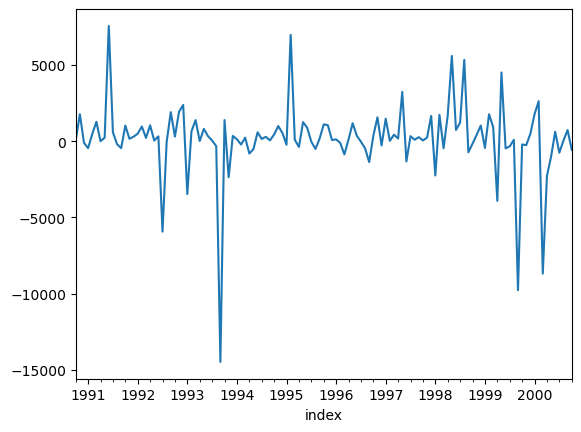

In [125]:
(monthly_globals.loc['1990-10-01':'2000-10-01']['vals']*monthly_globals.loc['1990-10-01':'2000-10-01']['m']).plot()
plt.show()

In [83]:
data['dol_volume_lag'] = data.groupby('permno')['vol'].shift(1)*(data.groupby('permno')['prc'].shift(1))

In [84]:
data['prod_dvl_ser'] = data['dol_volume_lag']*data['sign_ex_ret_lag']

In [85]:
data['month_year_perm'] = data['month-year'].astype(str) + data['permno'].astype(str)

In [86]:
liq_data = pd.read_feather('liq_data.feather')

df_ret = data.groupby(['month_year_perm'])['ex_ret'].mean()

In [87]:
ports = df_ret.reset_index().merge(liq_data,left_on = 'month_year_perm',right_on = 'index')

In [88]:
ports = ports.drop(['index'],axis = 1)

In [89]:
ports['permno'] = ports['month_year_perm'].astype(str).str[-5:]

In [90]:
ports['month_year'] = ports['month_year_perm'].astype(str).str[:-5]

In [91]:
ports = ports.dropna()

In [92]:
ports['bins'] = ports.groupby('month_year')['vals'].transform(pd.qcut,10,labels = False)

In [93]:
monthly_globals = ports.groupby('month_year')['vals'].mean()

In [94]:
monthly_globals = monthly_globals.to_frame().set_index(pd.to_datetime(monthly_globals.index.str[:-4] + '-' + monthly_globals.index.str[-4:]))

/tmp/ipykernel_1606558/2141871502.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_globals = monthly_globals.to_frame().set_index(pd.to_datetime(monthly_globals.index.str[:-4] + '-' + monthly_globals.index.str[-4:]))


In [95]:
ports =  ports.set_index(pd.to_datetime(ports['month_year'].str[:-4] + '-' + ports['month_year'].str[-4:]))

/tmp/ipykernel_1606558/4168558519.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ports =  ports.set_index(pd.to_datetime(ports['month_year'].str[:-4] + '-' + ports['month_year'].str[-4:]))


In [96]:
monthly_globals

,vals
month_year,
1926-10-01,2.415590e-06
1927-10-01,5.713572e-08
1928-10-01,1.097477e-07
1929-10-01,2.405081e-06
1930-10-01,-5.468959e-06
...,...
2018-09-01,1.603070e-08
2019-09-01,3.442042e-08
2020-09-01,-1.272896e-08


In [31]:
ports['mdt'] = port['month_year_perm']

0             (1.52e-10, 1.65e-09]
1             (9.87e-09, 6.48e-08]
2             (9.87e-09, 6.48e-08]
3           (-9.05e-08, -1.51e-08]
4          (-44147.022, -9.05e-08]
                    ...           
3553315     (-5.91e-10, -3.76e-11]
3553316     (-1.51e-08, -3.22e-09]
3553317      (-3.76e-11, 1.52e-10]
3553318      (-3.76e-11, 1.52e-10]
3553319      (-3.76e-11, 1.52e-10]
Name: vals, Length: 3553320, dtype: category
Categories (10, interval[float64, right]): [(-44147.022, -9.05e-08] < (-9.05e-08, -1.51e-08] < (-1.51e-08, -3.22e-09] < (-3.22e-09, -5.91e-10] ... (1.52e-10, 1.65e-09] < (1.65e-09, 9.87e-09] < (9.87e-09, 6.48e-08] < (6.48e-08, 14327.356]]

In [30]:
ports

,month_year_perm,ex_ret,vals,bins
0,10192610006,0.000583,1.191493e-09,"(1.52e-10, 1.65e-09]"
1,10192610022,-0.002393,1.342261e-08,"(9.87e-09, 6.48e-08]"
2,10192610030,0.001600,4.944852e-08,"(9.87e-09, 6.48e-08]"
3,10192610049,-0.000096,-3.803185e-08,"(-9.05e-08, -1.51e-08]"
4,10192610057,-0.017433,-1.924397e-06,"(-44147.022, -9.05e-08]"
...,...,...,...,...
3553315,9202293425,0.000375,-2.938097e-10,"(-5.91e-10, -3.76e-11]"
3553316,9202293426,-0.002469,-5.287389e-09,"(-1.51e-08, -3.22e-09]"
3553317,9202293427,0.001101,4.332515e-11,"(-3.76e-11, 1.52e-10]"
3553318,9202293429,0.004279,-1.978194e-11,"(-3.76e-11, 1.52e-10]"


In [130]:
def liq(x):
    x = x.dropna()
    if len(x) < 15:
        return np.nan
    #print(x.head())
    #return np.min(x)
    reg = smf.ols('ex_ret ~ 1 + ret_lag + prod_dvl_ser',data = x).fit() 
    return reg.params[2]

In [128]:
data = data.dropna()

In [132]:
data.g

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,mkt,ewmkt,month-year,ex_ret,ret_lag,ex_ret_lag,sign_ex_ret_lag,dol_volume_lag,prod_dvl_ser,month_year_perm,month_year_permno
6430,10015,1986-01-08,10,3,5812,9.875000,0.000000,264700.0,3988.0,-0.020744,-0.005117,11986,0.020744,0.000000,-0.013809,-1.0,4.345000e+04,-4.345000e+04,1198610015,1001511986
6432,10057,1986-01-08,11,1,3541,14.000000,-0.034483,31800.0,6279.0,-0.020744,-0.005117,11986,-0.013738,0.026549,0.012740,1.0,4.190500e+05,4.190500e+05,1198610057,1005711986
6433,10065,1986-01-08,14,1,6723,19.250000,-0.019108,16500.0,21313.0,-0.020744,-0.005117,11986,0.001636,0.006410,-0.007399,-1.0,2.217625e+05,-2.217625e+05,1198610065,1006511986
6438,10137,1986-01-08,11,1,4911,33.375000,-0.021978,65800.0,50057.0,-0.020744,-0.005117,11986,-0.001234,0.018657,0.004848,1.0,6.596362e+06,6.596362e+06,1198610137,1013711986
6439,10145,1986-01-08,11,1,1311,46.500000,-0.013263,617400.0,175194.0,-0.020744,-0.005117,11986,0.007482,0.002660,-0.011149,-1.0,2.125809e+07,-2.125809e+07,1198610145,1014511986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102297583,93425,2022-09-30,74,4,6221,27.320000,-0.022540,397845.0,7150.0,-0.012313,-0.004068,92022,-0.010227,-0.006752,0.014193,1.0,1.036649e+07,1.036649e+07,9202293425,9342592022
102297584,93426,2022-09-30,11,1,3676,29.590000,-0.020847,33279.0,12632.0,-0.012313,-0.004068,92022,-0.008534,-0.024847,-0.003902,-1.0,1.174712e+06,-1.174712e+06,9202293426,9342692022
102297585,93427,2022-09-30,12,1,3827,95.449997,0.005266,298894.0,36447.0,-0.012313,-0.004068,92022,0.017579,-0.015858,0.005087,1.0,1.308145e+07,1.308145e+07,9202293427,9342792022
102297586,93429,2022-09-30,11,5,6211,117.370003,-0.003058,834260.0,106062.0,-0.012313,-0.004068,92022,0.009255,-0.005323,0.015622,1.0,6.268746e+07,6.268746e+07,9202293429,9342992022


In [ ]:
gp = data.groupby('month_year_perm')
out = gp.apply(liq)
out

In [80]:
pd.DataFrame(out.reset_index().values,columns = ['index','vals']).to_feather('liq_data.feather')

In [22]:
for name,group in gp:
    reg = smf.ols('ex_ret ~ 1 + ret_lag + prod_dvl_ser',data = group).fit() 
    break

In [137]:
for name,group in gp:
    group_test = group
    break

In [138]:
group_test

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,mkt,ewmkt,month-year,ex_ret,ret_lag,ex_ret_lag,sign_ex_ret_lag,dol_volume_lag,prod_dvl_ser,month_year_perm,month_year_permno
58948208,10006,1926-10-01,10,1,3740,100.500,0.000000,600.0,600.0,0.007404,0.003820,101926,-0.007404,0.008783,0.005706,1.0,40200.0,40200.0,10192610006,10006101926
58948753,10006,1926-10-02,10,1,3740,100.625,0.001244,1300.0,600.0,-0.000921,0.001629,101926,0.002164,0.000000,-0.007404,-1.0,60300.0,-60300.0,10192610006,10006101926
58949298,10006,1926-10-04,10,1,3740,99.500,-0.011180,800.0,600.0,-0.013722,-0.014004,101926,0.002542,0.001244,0.002164,1.0,130812.5,130812.5,10192610006,10006101926
58949843,10006,1926-10-05,10,1,3740,100.000,0.005025,200.0,600.0,-0.010924,-0.010482,101926,0.015949,-0.011180,0.002542,1.0,79600.0,79600.0,10192610006,10006101926
58950389,10006,1926-10-06,10,1,3740,99.000,-0.010000,500.0,600.0,-0.005597,-0.010973,101926,-0.004403,0.005025,0.015949,1.0,20000.0,20000.0,10192610006,10006101926
58950935,10006,1926-10-07,10,1,3740,98.500,-0.005051,800.0,600.0,-0.007345,-0.003343,101926,0.002294,-0.010000,-0.004403,-1.0,49500.0,-49500.0,10192610006,10006101926
58951481,10006,1926-10-08,10,1,3740,98.500,0.000000,100.0,600.0,0.005984,0.006730,101926,-0.005984,-0.005051,0.002294,1.0,78800.0,78800.0,10192610006,10006101926
58952027,10006,1926-10-09,10,1,3740,98.500,0.000000,400.0,600.0,-0.009203,-0.006003,101926,0.009203,0.000000,-0.005984,-1.0,9850.0,-9850.0,10192610006,10006101926
58952573,10006,1926-10-11,10,1,3740,98.500,0.000000,100.0,600.0,-0.006713,-0.008007,101926,0.006713,0.000000,0.009203,1.0,39400.0,39400.0,10192610006,10006101926
58953119,10006,1926-10-13,10,1,3740,98.500,0.000000,200.0,600.0,0.006953,0.004594,101926,-0.006953,0.000000,0.006713,1.0,9850.0,9850.0,10192610006,10006101926


In [8]:
sigma = 0.2
T = 2/12
r = 0.01
S_0 = 100
X = 105

steps = 2
dt = T/steps

u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))
print(u)
print(d)

S_1_j = np.zeros(steps + 1)
S_1_j[0] = S_0*(u**steps)
Calls1 = np.zeros(steps+1)

for i in range(1,steps+1):
    S_1_j[i] = S_1_j[i-1]*(d**2)
    Calls1[i] = np.max([S_0 - X,0])


for j in range(steps):
    print(S_1_j)
    print(Calls1)

    S_0_j = np.zeros(steps - j)
    S_0_j[0] = S_0*(u**(steps - j - 1))
    Calls = np.zeros(steps - j)
    for i in range(1,steps - j):
        S_0_j[i] = S_0_j[i-1]*(d**2)
        q = np.array([S_0_j[i],np.exp(-r*dt)])
        D = np.array([[S_1_j[i],S_1_j[i-1]],[1,1]])
        phi = np.linalg.inv(D)@q
        Calls[i] = np.array([Calls1[i],Calls[i-1]])@phi

        S_1_j = S_0_j
        Calls1 = Calls

1.0594342369612506
0.9439000224008953
[112.24009024 100.          89.09472523]
[0. 0. 0.]
[105.9434237   94.39000224]
[0. 0.]


In [5]:
Calls

array([0.])

In [23]:
reg.params

Intercept       5.072938e-04
ret_lag        -2.783609e-01
prod_dvl_ser    1.191493e-09
dtype: float64

In [69]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ex_ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.633
Date:                Tue, 28 Mar 2023   Prob (F-statistic):             0.0719
Time:                        16:52:34   Log-Likelihood:                 22050.
No. Observations:                9518   AIC:                        -4.409e+04
Df Residuals:                    9515   BIC:                        -4.407e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0009      0.000     -3.778      0.000      -0.001      -0.000
ret_lag         -0.0214      0.009     -2.258      0.024      -0.040      -0.003
prod_dvl_ser -1.978e-11   1.19e-10     -0.166      0.868   -2.54e-10    2.14e-10
==============================================================================
Omnibus:                     1847.036   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57478.666
Skew:                           0.070   Prob(JB):                         0.00
Kurtosis:                      15.038   Cond. No.                     8.00e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  8e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
reg = smf.ols('ex_ret ~ 1 + ret_lag + sign_ex_ret_lag*dol_volume_lag',data = data.groupby(['month-year'])).fit()

/home/andrew/anaconda3/lib/python3.9/site-packages/patsy/categorical.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)


PatsyError: Error interpreting categorical data: all items must be hashable
    ex_ret ~ 1 + ret_lag + sign_ex_ret_lag*dol_volume_lag
                                           ^^^^^^^^^^^^^^